In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('SELECT * FROM studentsperformance', con = engine)
engine.dispose()


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


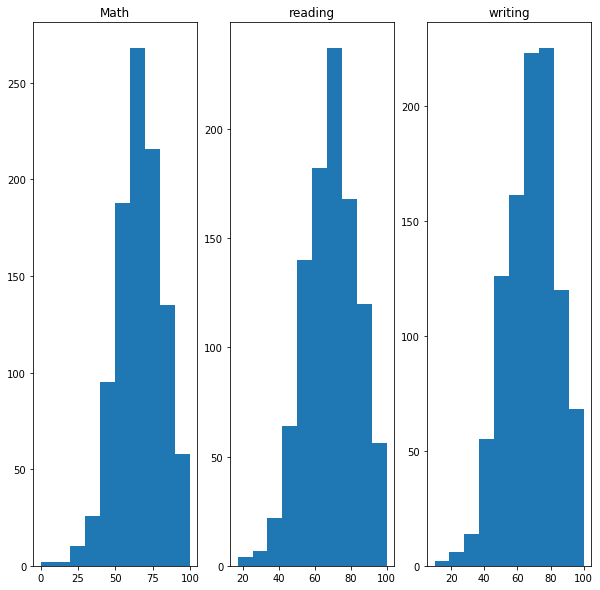

In [4]:
plt.figure(figsize = (10,10))

plt.subplot(1,3,1)
plt.hist(df['math score'])
plt.title('Math')


plt.subplot(1,3,2)
plt.hist(df['reading score'])
plt.title('reading')


plt.subplot(1,3,3)
plt.hist(df['writing score'])
plt.title('writing')

plt.show()

In [5]:
#That isn't normal

mathJ = jarque_bera(df['math score'])
mathN = normaltest(df['math score'])
readingJ = jarque_bera(df['reading score'])
readingN = normaltest(df['reading score'])
writingJ = jarque_bera(df['writing score'])
writingN = normaltest(df['writing score'])

print('Jarque-Bera is {0} and p value is {1}'.format(mathJ[0], mathJ[1]))
print('Normality is {0} and p value is {1}'.format(mathN[0], mathN[1]))




print('Jarque-Bera is {0} and p value is {1}'.format(readingJ[0], readingJ[1]))
print('Normality is {0} and p value is {1}'.format(readingN[0], readingN[1]))


print('Jarque-Bera is {0} and p value is {1}'.format(writingJ[0], writingJ[1]))
print('Normality is {0} and p value is {1}'.format(writingN[0], writingN[1]))

Jarque-Bera is 15.912256686712709 and p value is 0.0003505075386818213
Normality is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera is 11.383300575987892 and p value is 0.0033740202672214448
Normality is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera is 13.98509448257235 and p value is 0.0009187033894586527
Normality is 13.606450837263859 and p value is 0.0011101885439899974


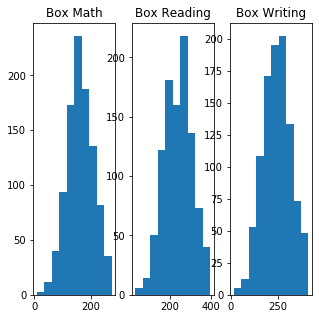

In [6]:

MathB,_ = boxcox(df[df['math score']>0]['math score'])
ReadingB,_ = boxcox(df['reading score'])
WritingB,_ = boxcox(df['writing score'])

plt.figure(figsize = (5,5))

plt.subplot(1,3,1)
plt.hist(MathB)
plt.title('Box Math')


plt.subplot(1,3,2)
plt.hist(ReadingB)
plt.title('Box Reading')

plt.subplot(1,3,3)
plt.hist(WritingB)
plt.title('Box Writing')


plt.show()

In [7]:
NmathJ = jarque_bera(MathB)
NmathN = normaltest(MathB)
NreadingJ = jarque_bera(ReadingB)
NreadingN = normaltest(ReadingB)
NwritingJ = jarque_bera(WritingB)
NwritingN = normaltest(WritingB)


print('Jarque-Bera is {0} and p value is {1}'.format(NmathJ[0], NmathJ[1]))
print('Normality is {0} and p value is {1}'.format(NmathN[0], NmathN[1]))




print('Jarque-Bera is {0} and p value is {1}'.format(NreadingJ[0], NreadingJ[1]))
print('Normality is {0} and p value is {1}'.format(NreadingN[0], NreadingN[1]))


print('Jarque-Bera is {0} and p value is {1}'.format(NwritingJ[0], NwritingJ[1]))
print('Normality is {0} and p value is {1}'.format(NwritingN[0], NwritingN[1]))

Jarque-Bera is 1.7200982636836308 and p value is 0.42314129209599327
Normality is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera is 4.119778573559666 and p value is 0.127468081515408
Normality is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera is 4.746478090042761 and p value is 0.09317842784043195
Normality is 6.267311355052559 and p value is 0.04355827085003712


# That looks more normal

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <a list of 10 Patch objects>)

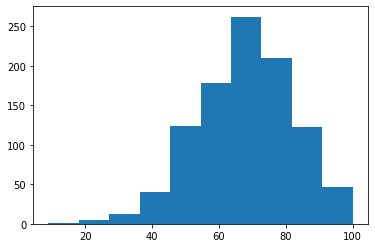

In [14]:
score = (df['math score'] + df['reading score'] + df['writing score'])/3
plt.hist(score)
#eh kinda

In [17]:
Jscore = jarque_bera(score)
Nscore = normaltest(score)
Bscore,_ = boxcox(score)
BJscore = jarque_bera(Bscore)
BNscore,_ = boxcox(score)
BNscore = normaltest(BNscore)

print('Jarque-Bera is {0} and p value is {1}'.format(Jscore[0], Jscore[1]))
print('Normality is {0} and p value is {1}'.format(Nscore[0], Nscore[1]))


print('Box Jarque-Bera is {0} and p value is {1}'.format(BJscore[0], BJscore[1]))
print('Box Normality is {0} and p value is {1}'.format(BNscore[0], BNscore[1]))


Jarque-Bera is 15.453387913085168 and p value is 0.00044089934264401887
Normality is 15.186721327231322 and p value is 0.0005037851534494478
Box Jarque-Bera is 2.4353989331279173 and p value is 0.29591013563984203
Box Normality is 2.779857602227616 and p value is 0.24909303914726724


<BarContainer object of 2 artists>

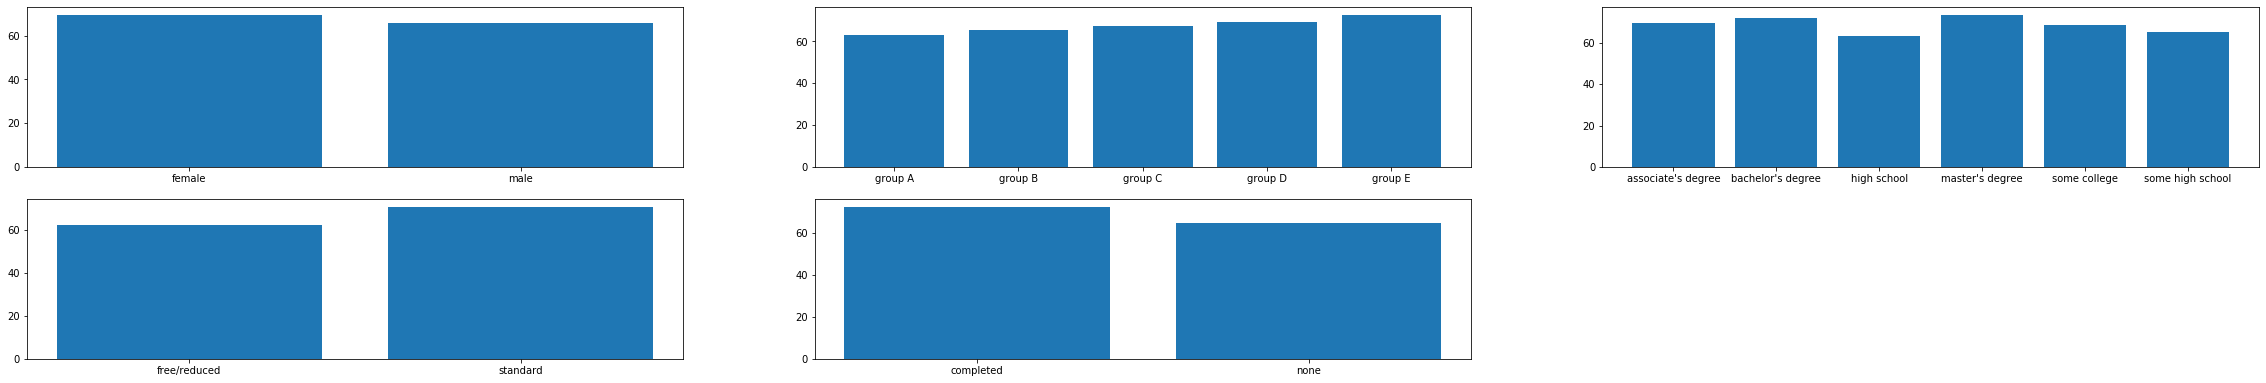

In [40]:
df['total score'] = score

plt.figure(figsize = (40, 10))

plt.subplot(3,3,1)
plt.bar(df.groupby('gender')
            ['total score'].mean().index, df.groupby('gender')['total score'].mean())

plt.subplot(3,3,2)
plt.bar(df.groupby('race/ethnicity')
            ['total score'].mean().index, df.groupby('race/ethnicity')['total score'].mean())


plt.subplot(3,3,3)
plt.bar(df.groupby('parental level of education')
            ['total score'].mean().index, df.groupby('parental level of education')['total score'].mean())

plt.subplot(3,3,4)
plt.bar(df.groupby('lunch')
            ['total score'].mean().index, df.groupby('lunch')['total score'].mean())


plt.subplot(3,3,5)
plt.bar(df.groupby('test preparation course')
            ['total score'].mean().index, df.groupby('test preparation course')['total score'].mean())